
# ARIMA and Seasonal ARIMA


## Autoregressive Integrated Moving Averages

The general process for ARIMA models is the following:
* Visualize the Time Series Data
* Make the time series data stationary
* Plot the Correlation and AutoCorrelation Charts
* Construct the ARIMA Model or Seasonal ARIMA based on the data
* Use the model to make predictions

Let's go through these steps!

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_excel('predictsasc.xlsx')

In [3]:
df.head()

,Month,Value (in Cr.)
0,2016-07-01,0.38
1,2016-08-01,3.09
2,2016-09-01,32.64
3,2016-10-01,48.57
4,2016-11-01,100.46


In [4]:
df.tail()

,Month,Value (in Cr.)
66,2022-01-01,831993.11
67,2022-02-01,826843.00
68,2022-03-01,960581.66
69,2022-04-01,983302.27
70,2022-05-01,1041520.07


In [6]:
## Cleaning up the data
df.columns=["Month","Value"]
df.head()

,Month,Value
0,2016-07-01,0.38
1,2016-08-01,3.09
2,2016-09-01,32.64
3,2016-10-01,48.57
4,2016-11-01,100.46


In [7]:
## Drop last 2 rows
df.drop(106,axis=0,inplace=True)

KeyError: ignored

In [8]:
df.tail()

,Month,Value
66,2022-01-01,831993.11
67,2022-02-01,826843.00
68,2022-03-01,960581.66
69,2022-04-01,983302.27
70,2022-05-01,1041520.07


In [ ]:
df.drop(105,axis=0,inplace=True)

In [ ]:
df.tail()

,Month,Sales
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [9]:
# Convert Month into Datetime
df['Month']=pd.to_datetime(df['Month'])

In [10]:
df.head()

,Month,Value
0,2016-07-01,0.38
1,2016-08-01,3.09
2,2016-09-01,32.64
3,2016-10-01,48.57
4,2016-11-01,100.46


In [11]:
df.set_index('Month',inplace=True)

In [12]:
df.head()

,Value
Month,
2016-07-01,0.38
2016-08-01,3.09
2016-09-01,32.64
2016-10-01,48.57
2016-11-01,100.46


In [13]:
df.describe()

,Value
count,7.100000e+01
mean,2.488948e+05
std,2.877004e+05
min,3.800000e-01
25%,1.437272e+04
50%,1.465664e+05
75%,4.035877e+05
max,1.041520e+06


## Step 2: Visualize the Data

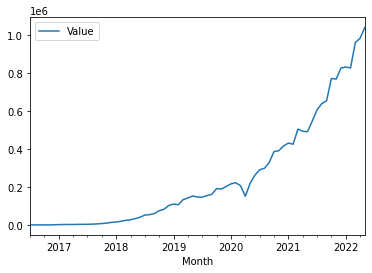

In [14]:
df.plot()

In [15]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [17]:
test_result=adfuller(df['Value'])

In [18]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [19]:
adfuller_test(df['Value'])

ADF Test Statistic : 3.326716928114111
p-value : 1.0
#Lags Used : 11
Number of Observations Used : 59
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


## Differencing

In [20]:
df['Value First Difference'] = df['Value'] - df['Value'].shift(1)

In [21]:
df['Value'].shift(1)

Month
2016-07-01          NaN
2016-08-01         0.38
2016-09-01         3.09
2016-10-01        32.64
2016-11-01        48.57
                ...    
2022-01-01    826848.22
2022-02-01    831993.11
2022-03-01    826843.00
2022-04-01    960581.66
2022-05-01    983302.27
Name: Value, Length: 71, dtype: float64

In [22]:
df['Seasonal First Difference']=df['Value']-df['Value'].shift(12)

In [23]:
df.head(14)

,Value,Value First Difference,Seasonal First Difference
Month,,,
2016-07-01,0.38,NaN,NaN
2016-08-01,3.09,2.71,NaN
2016-09-01,32.64,29.55,NaN
2016-10-01,48.57,15.93,NaN
2016-11-01,100.46,51.89,NaN
2016-12-01,707.93,607.47,NaN
2017-01-01,1696.22,988.29,NaN
2017-02-01,1937.71,241.49,NaN
2017-03-01,2425.14,487.43,NaN


In [24]:
## Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : 2.3605852220479195
p-value : 0.9989905369158489
#Lags Used : 2
Number of Observations Used : 56
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


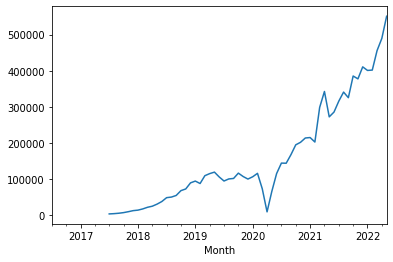

In [25]:
df['Seasonal First Difference'].plot()

## Auto Regressive Model
![image.png](attachment:image.png)

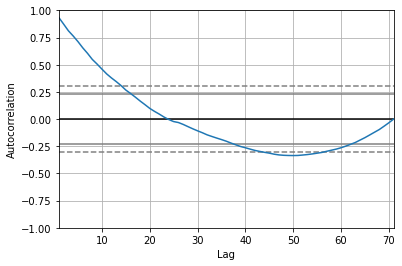

In [26]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Value'])
plt.show()

### Final Thoughts on Autocorrelation and Partial Autocorrelation

* Identification of an AR model is often best done with the PACF.
    * For an AR model, the theoretical PACF “shuts off” past the order of the model.  The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point.  Put another way, the number of non-zero partial autocorrelations gives the order of the AR model.  By the “order of the model” we mean the most extreme lag of x that is used as a predictor.
    
    
* Identification of an MA model is often best done with the ACF rather than the PACF.
    * For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner.  A clearer pattern for an MA model is in the ACF.  The ACF will have non-zero autocorrelations only at lags involved in the model.
    
    p,d,q
    p AR model lags
    d differencing
    q MA lags

In [29]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


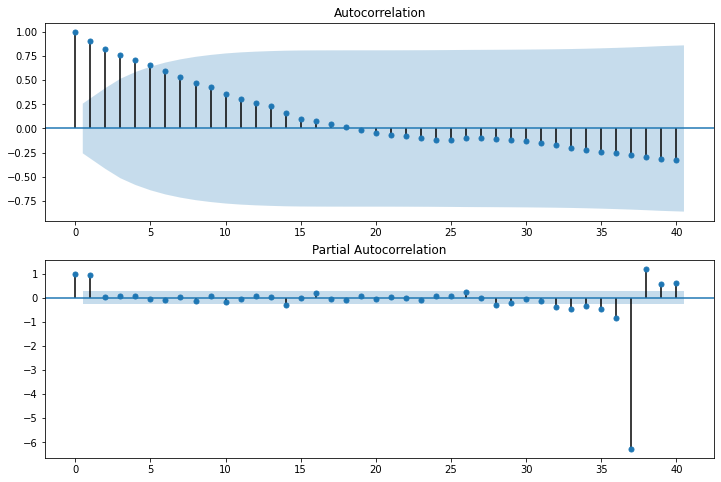

In [32]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = statsmodels.graphics.tsaplots.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = statsmodels.graphics.tsaplots.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

In [33]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

In [35]:
model=ARIMA(df['Value'],order=(1,1,1))
model_fit=model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [ ]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                  104
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -951.126
Method:                       css-mle   S.D. of innovations           2227.262
Date:                Wed, 18 Mar 2020   AIC                           1910.251
Time:                        13:40:32   BIC                           1920.829
Sample:                    02-01-1964   HQIC                          1914.536
                         - 09-01-1972                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            22.7838     12.405      1.837      0.069      -1.530      47.098
ar.L1.D.Sales     0.4343      0.089      4.866      0.000       0.259       0.609
ma.L1.D.Sales    -1.0000      0.026    -38.503      0.000      -1.051      -0.949
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.3023           +0.0000j            2.3023            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

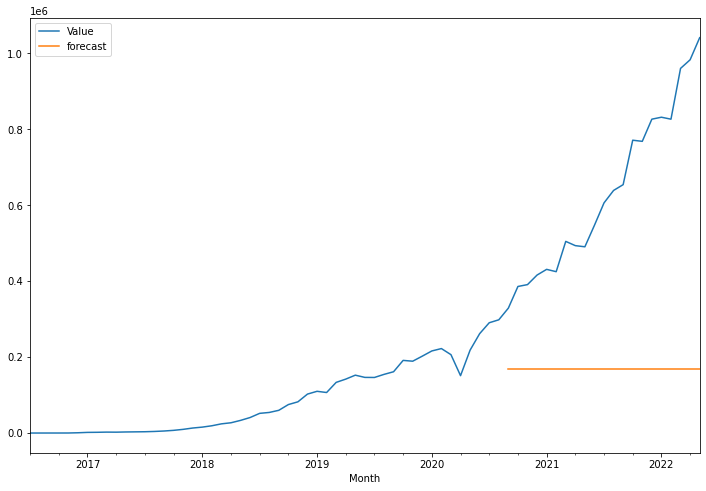

In [37]:
df['forecast']=model_fit.predict(start=50,end=72,dynamic=True)
df[['Value','forecast']].plot(figsize=(12,8))

In [38]:
import statsmodels.api as sm

In [39]:
model=sm.tsa.statespace.SARIMAX(df['Value'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


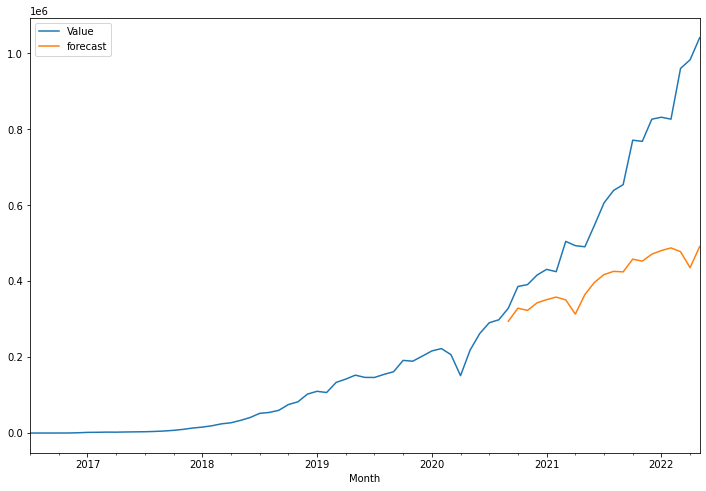

In [40]:
df['forecast']=results.predict(start=50,end=72,dynamic=True)
df[['Value','forecast']].plot(figsize=(12,8))

In [41]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [42]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [43]:
future_datest_df.tail()

,Value,Value First Difference,Seasonal First Difference,forecast
2023-12-01,NaN,NaN,NaN,NaN
2024-01-01,NaN,NaN,NaN,NaN
2024-02-01,NaN,NaN,NaN,NaN
2024-03-01,NaN,NaN,NaN,NaN
2024-04-01,NaN,NaN,NaN,NaN


In [44]:
future_df=pd.concat([df,future_datest_df])

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/kalman_filter.py:1960: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  ' effect.', ValueWarning)


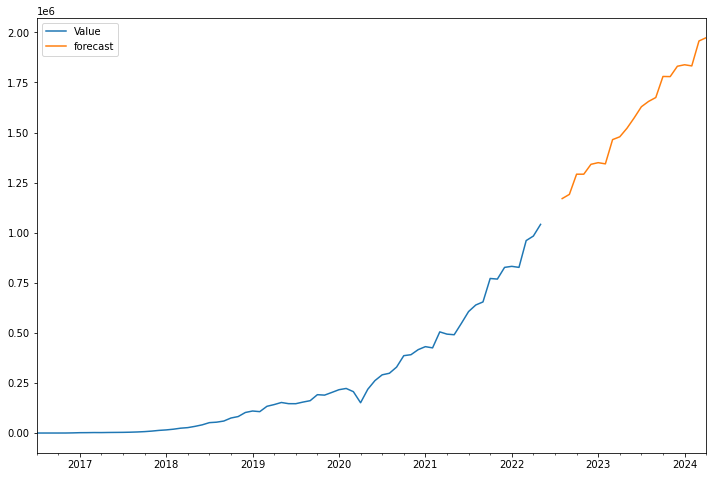

In [45]:
future_df['forecast'] = results.predict(start = 73, end = 120, dynamic= True)  
future_df[['Value', 'forecast']].plot(figsize=(12, 8)) 